## Importar librerías

In [1]:
import numpy as np
import pickle
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pylab as plt
from minisom import MiniSom

class KMedians(KMeans):
    def _e_step(self, X):
        self.labels_ = manhattan_distances(X, self.cluster_centers_).argmin(axis=1)
    def _average(self, X):
        return np.median(X, axis=0)

## Importar dataset


In [2]:
country_data = pickle.load(open("country_normalized_exports.pkl", "rb"))
country_data['feature_name'].insert(
    76, '(Reserved for possible future use in the Harmonized System.)')
world_data = country_data['world_data']
world_labels = country_data['world_labels']
world_labels_short = country_data['world_labels_short']
feature_names = country_data['feature_name']
N, M = world_data.shape
print("Nombres de paises y sus abreviaturas:")
I = np.argsort(world_labels_short)
print(np.concatenate((np.asarray(world_labels_short)[I, np.newaxis], 
                      np.asarray(world_labels)[I, np.newaxis]), axis=1))

Nombres de paises y sus abreviaturas:
[['abw' 'Aruba']
 ['afg' 'Afghanistan']
 ['ago' 'Angola']
 ['aia' 'Anguilla']
 ['alb' 'Albania']
 ['and' 'Andorra']
 ['are' 'United Arab Emirates']
 ['arg' 'Argentina']
 ['arm' 'Armenia']
 ['asm' 'American Samoa']
 ['atf' 'French Southern Territories']
 ['atg' 'Antigua and Barbuda']
 ['aus' 'Australia']
 ['aut' 'Austria']
 ['aze' 'Azerbaijan']
 ['bdi' 'Burundi']
 ['ben' 'Benin']
 ['bes' 'Caribbean Netherlands']
 ['bfa' 'Burkina Faso']
 ['bgd' 'Bangladesh']
 ['bgr' 'Bulgaria']
 ['bhr' 'Bahrain']
 ['bhs' 'Bahamas']
 ['bih' 'Bosnia and Herzegovina']
 ['blr' 'Belarus']
 ['blx' 'Belgium-Luxembourg']
 ['blz' 'Belize']
 ['bmu' 'Bermuda']
 ['bol' 'Bolivia, Plurinational State of']
 ['bra' 'Brazil']
 ['brb' 'Barbados']
 ['brn' 'Brunei Darussalam']
 ['btn' 'Bhutan']
 ['caf' 'Central African Republic']
 ['can' 'Canada']
 ['cck' 'Cocos (Keeling) Islands']
 ['che' 'Switzerland']
 ['chl' 'Chile']
 ['chn' 'China']
 ['civ' "Côte d'Ivoire"]
 ['cmr' 'Cameroon']
 ['c

In [3]:
feature_names,len(feature_names)

(['Live animals',
  'Meat and edible meat offal',
  'Fish and crustaceans, molluscs and other aquatic invertebrates',
  'Dairy produce; birds’ eggs; natural honey; edible products of animal origin, not elsewhere specified or included',
  'Products of animal origin, not elsewhere specified or included',
  'Live trees and other plants; bulbs, roots and the like; cut flowers and ornamental foliage',
  'Edible vegetables and certain roots and tubers',
  'Edible fruit and nuts; peel of citrus fruit or melons',
  'Coffee, tea, mate and spices',
  'Cereals',
  'Products of the milling industry; malt; starches; inulin; wheat gluten',
  'Oil seeds and oleaginous fruits; miscellaneous grains, seeds and fruit; industrial or medicinal plants ; straw and fodder',
  'Lac; gums, resins and other vegetable saps and extracts',
  'Vegetable plaiting materials; vegetable products not elsewhere specified or included',
  'Animal or vegetable fats and oils and their cleavage products; prepared edible fats; 

## Agrupar exportaciones

In [4]:
grouped_data = np.zeros((len(world_data), 15))
indexes = [0, 5, 15, 24, 27, 38, 40, 43, 49, 63, 67, 71, 83, 85, 89, 97]
for i in range(15):
    start = indexes[i]
    end = indexes[i+1]
    grouped_data[:, i] = world_data[:, start:end].sum(axis=1)
grouped_feature_names = [
    'Animal & Animal Products',
    'Vegetable Products',
    'Foodstuffs',
    'Mineral Products',
    'Chemicals & Allied Industries',
    'Plastics / Rubbers',
    'Raw Hides, Skins, Leather & Furs',
    'Wood & Wood Products',
    'Textiles',
    'Footwear / Headgear',
    'Stone / Glass',
    'Metals',
    'Machinery / Electrical',
    'Transportation',
    'Miscellaneous'
]

## Seleccionar subconjunto de paises para etiquetas

In [5]:
countries_subset = ['are','arg','aus','aut','bgd',
    'bgr','bhr','blr','blx','bol','bra','caf','can',
    'chl','chn','civ','cmr','cod','cog','col','cub',
    'deu','dnk','ecu','egy','esp','fin','fra','gbr',
    'geo','gha','grc','hkg','hti','idn','ind','irl',
    'irn','irq','isr','ita','jpn','kwt','mex','nld',
    'nor','pak','per','pol','prk','prt','pry','pse',
    'qat','rus','sau','sgp','ury','usa','yem','zaf',
    'kaz','kor','idn','isl','sen','uzb','sur','flk',
    'grl','tun','cri','kna','eth','afg','uga'
]

## Activar/Desactivar agrupación de productos

Cambie el valor de la variable booleana is_grouped

In [6]:
is_grouped = True
if is_grouped:
    selected_data = grouped_data
    selected_features = grouped_feature_names
else:
    selected_data = world_data
    selected_features = feature_names
# Normalizar datos
world_data_scaled = scale(selected_data, axis=0, with_mean=True, with_std=True)

In [7]:
grouped_data.shape,world_data.shape

((219, 15), (219, 97))

## Clustering usando kmedians

El parámetro n_clusters modifica el número de clusters

In [8]:
clustering = KMedians(n_clusters=7)
pred_labels = clustering.fit_predict(world_data_scaled)
print("Suma de errores cuadráticos: %f" %(clustering.inertia_))

Suma de errores cuadráticos: 1961.275679


## Visualización con PCA

Varianza explicada por los primeros componentes principales:
[0.15481744 0.10809297 0.09129899 0.08445255 0.07320873 0.07005537
 0.06960979 0.06535666 0.05983643 0.05554138 0.05104628]
Suma acumulada de los primeros componentes principales: 0.883317


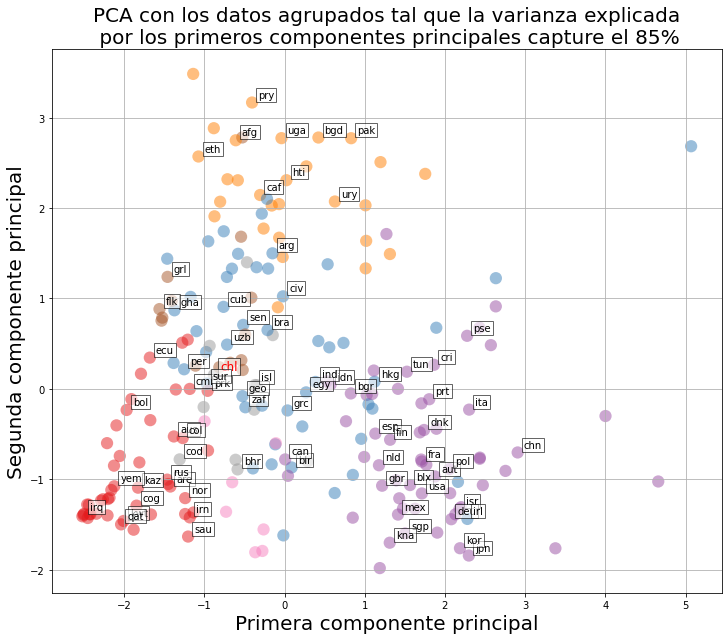

In [9]:
pca = PCA(n_components=11)
pca_no_kernel_projection = pca.fit_transform(world_data_scaled)
world_data_projected = pca_no_kernel_projection
print("Varianza explicada por los primeros componentes principales:")
print(pca.explained_variance_ratio_)
print("Suma acumulada de los primeros componentes principales: %f" % np.sum(pca.explained_variance_ratio_))
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(world_data_projected[:, 0], world_data_projected[:, 1], 
           c=pred_labels/clustering.n_clusters, linewidth=0, alpha=0.5, s=150, cmap='Set1')
plt.title('PCA con los datos agrupados tal que la varianza explicada\n por los primeros componentes principales capture el 85%',size=20)
plt.xlabel('Primera componente principal',size=20)
plt.ylabel('Segunda componente principal',size=20)
xscale = world_data_projected[:, 0].max() - world_data_projected[:, 0].min()
yscale = world_data_projected[:, 1].max() - world_data_projected[:, 1].min()
for i in range(N):
    if world_labels_short[i] in countries_subset:
        if world_labels_short[i] == "chl":
            ax.annotate(world_labels_short[i], 
                        xy=(world_data_projected[i, 0]+0.01*xscale, world_data_projected[i, 1]+0.01*yscale), fontsize=12, color='r',
                       bbox={'facecolor':'white', 'alpha':0.6, 'pad':2})
        else:
            ax.annotate(world_labels_short[i], 
                        xy=(world_data_projected[i, 0]+0.01*xscale, world_data_projected[i, 1]+0.01*yscale), fontsize=10,
                       bbox={'facecolor':'white', 'alpha':0.6, 'pad':2})
plt.grid()

## Visualización con KernelPCA

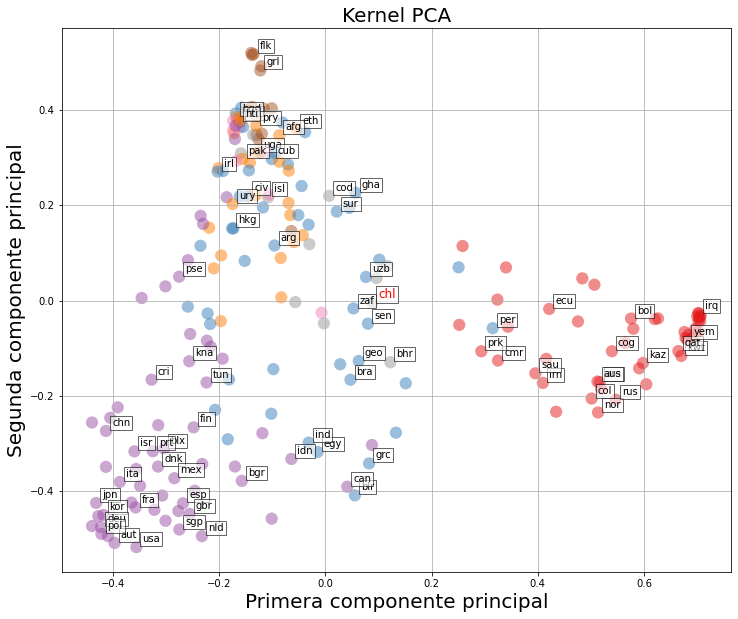

In [10]:
pca = KernelPCA(n_components=11, kernel="rbf")
pca_kernel_projection = pca.fit_transform(world_data_scaled) 
world_data_projected = pca_kernel_projection
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(world_data_projected[:, 0], world_data_projected[:, 1], 
           c=pred_labels/clustering.n_clusters, linewidth=0, alpha=0.5, s=150, cmap='Set1')
plt.title('Kernel PCA',size=20)
plt.xlabel('Primera componente principal',size=20)
plt.ylabel('Segunda componente principal',size=20)
xscale = world_data_projected[:, 0].max() - world_data_projected[:, 0].min()
yscale = world_data_projected[:, 1].max() - world_data_projected[:, 1].min()
for i in range(N):
    if world_labels_short[i] in countries_subset:
        if world_labels_short[i] == "chl":
            ax.annotate(world_labels_short[i], 
                        xy=(world_data_projected[i, 0]+0.01*xscale, world_data_projected[i, 1]+0.01*yscale), fontsize=12, color='r',
                       bbox={'facecolor':'white', 'alpha':0.6, 'pad':2})
        else:
            ax.annotate(world_labels_short[i], 
                        xy=(world_data_projected[i, 0]+0.01*xscale, world_data_projected[i, 1]+0.01*yscale), fontsize=10,
                       bbox={'facecolor':'white', 'alpha':0.6, 'pad':2})
plt.grid()

## Visualización SOM sobre PCA

In [18]:
som_data = pca_no_kernel_projection # Componentes principales de PCA sin kernel
som_size = [30, 25]
sm = MiniSom(som_size[0], som_size[1], som_data.shape[1], 
             sigma=np.amax(som_size)/4, sigma_final=np.amax(som_size)/10,
             learning_rate=1.5, learning_rate_final=0.5)
print("Error de cuantización (inicial): %f" %(sm.quantization_error(som_data)))
# Ajuste grueso
sm.train_random(som_data, 2000)
print("Error de cuantización (ajuste grueso): %f" %(sm.quantization_error(som_data)))
# Ajuste fino
sm.sigma = np.amax(som_size)/10
sm.sigma_final = 1.5
sm.learning_rate = 0.5
sm.learning_rate_final = 0.1
sm.train_random(som_data, 2000)
print("Error de cuantización (ajuste fino): %f" %(sm.quantization_error(som_data)))

Error de cuantización (inicial): 2.640724
Error de cuantización (ajuste grueso): 2.459857
Error de cuantización (ajuste fino): 2.431586


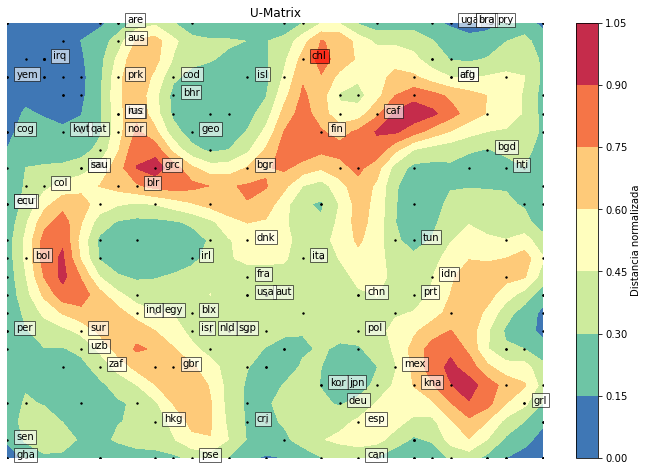

In [19]:
# U-Matrix
umat = sm.distance_map()
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(1, 1, 1)
cf = ax.contourf(umat.T, cmap=plt.cm.Spectral_r)
plt.colorbar(cf, label='Distancia normalizada')
plt.title('U-Matrix')
ax.axis('off')
for i in range(N):
    bmu = sm.winner(som_data[i, :])
    ax.scatter(bmu[0], bmu[1], s=2, c='k')
    if world_labels_short[i] in countries_subset:
        if world_labels_short[i] == "chl":
            ax.annotate(world_labels_short[i], xy=(bmu[0]+0.5, bmu[1]),
                   bbox={'facecolor':'red', 'alpha':0.6, 'pad':2})
        else:
            ax.annotate(world_labels_short[i], xy=(bmu[0]+0.5, bmu[1]),
                       bbox={'facecolor':'white', 'alpha':0.6, 'pad':2})

## Visualización SOM sobre Kernel PCA

In [13]:
som_kdata = pca_kernel_projection # Componentes principales de PCA sin kernel
som_ksize = [30, 25]
ksm = MiniSom(som_ksize[0], som_ksize[1], som_kdata.shape[1], 
             sigma=np.amax(som_ksize)/4, sigma_final=np.amax(som_ksize)/10,
             learning_rate=1.5, learning_rate_final=0.5)
print("Error de cuantización (inicial): %f" %(ksm.quantization_error(som_kdata)))
# Ajuste grueso
ksm.train_random(som_kdata, 2000)
print("Error de cuantización (ajuste grueso): %f" %(ksm.quantization_error(som_kdata)))
# Ajuste fino
ksm.sigma = np.amax(som_ksize)/10
ksm.sigma_final = 1.5
ksm.learning_rate = 0.5
ksm.learning_rate_final = 0.1
ksm.train_random(som_kdata, 2000)
print("Error de cuantización (ajuste fino): %f" %(ksm.quantization_error(som_kdata)))

Error de cuantización (inicial): 0.653103
Error de cuantización (ajuste grueso): 0.436209
Error de cuantización (ajuste fino): 0.435409


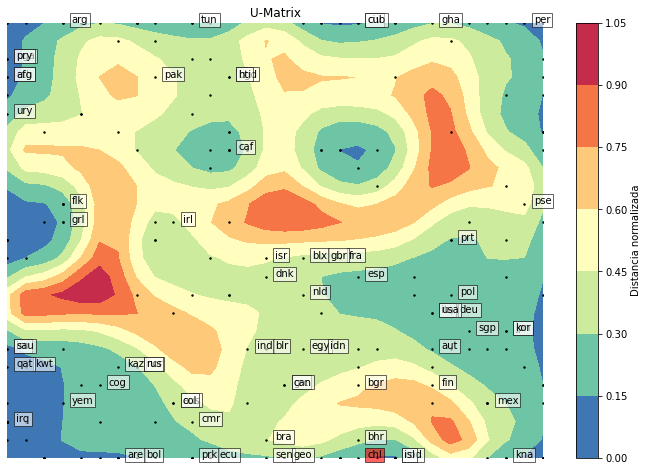

In [14]:
# U-Matrix
umat = ksm.distance_map()
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(1, 1, 1)
cf = ax.contourf(umat.T, cmap=plt.cm.Spectral_r)
plt.colorbar(cf, label='Distancia normalizada')
plt.title('U-Matrix')
ax.axis('off')
for i in range(N):
    bmu = ksm.winner(som_kdata[i, :])
    ax.scatter(bmu[0], bmu[1], s=2, c='k')
    if world_labels_short[i] in countries_subset:
        if world_labels_short[i] == "chl":
            ax.annotate(world_labels_short[i], xy=(bmu[0]+0.5, bmu[1]),
                   bbox={'facecolor':'red', 'alpha':0.6, 'pad':2})
        else:
            ax.annotate(world_labels_short[i], xy=(bmu[0]+0.5, bmu[1]),
                       bbox={'facecolor':'white', 'alpha':0.6, 'pad':2})

# Programación
Visualize la base de datos (agrupando los productos en las 15 categor´ıas) utilizando la t´ecnica
t-SNE. Utilize la implementaci´on de t-SNE disponible en sklearn. Ajuste la tasa de aprendizaje
de tal manera que la proyecci´on se vea razonable.

In [34]:
from sklearn.manifold import TSNE

#The learning rate for t-SNE is usually in the range [10.0, 1000.0]
#perplexity: Consider selecting a value between 5 and 50.

tsne = TSNE(learning_rate=500, perplexity=5, n_iter=600)
tsne_digits = tsne.fit_transform(world_data_scaled)

Text(0, 0.5, 'tsne-2d-two')

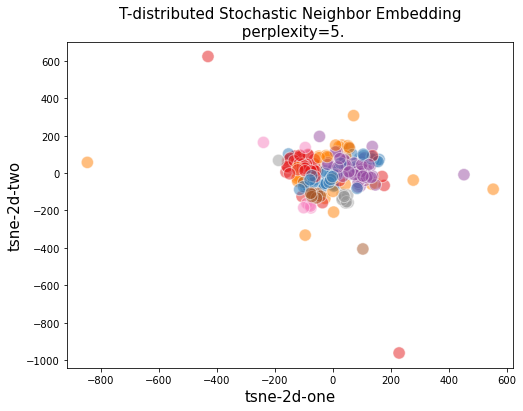

In [35]:
import pandas as pd
import seaborn as sns

results= pd.DataFrame()
results['label']=world_labels_short
results['Tsne-2d-one']=tsne_digits[:,0]
results['Tsne-2d-two']=tsne_digits[:,1]
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='Tsne-2d-one', y='Tsne-2d-two',
    c=pred_labels/clustering.n_clusters,
    data=results,
    palette=sns.color_palette("hls", 10),
    alpha=0.5, 
    s=150, 
    cmap='Set1'
)
plt.title('T-distributed Stochastic Neighbor Embedding\n perplexity=5.',size=15)
plt.xlabel('tsne-2d-one',size=15)
plt.ylabel('tsne-2d-two',size=15)

